# Tarea 1
## María Isabel Jaimes Arias

1. Consiga el conjunto de datos iris.csv. (ver enlace adjunto)
2. Escriba una clase iterable que tenga la siguiente funcionalidad

   2.1 Al instanciar un objeto, lee el archivo de datos y lo coloca en un dataframe interno en la clase.
   
   2.2 Cada vez que se le pidan datos, debe regresar los dos siguientes datos.
   
   2.3 Imprima "error" si los datos se han agotado.

In [1]:
# Librerías a utilizar
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("iris_csv.csv") # Importación de la base de datos

In [4]:
class Iteracion:
    def __init__(self, df):
        self.datos = pd.read_csv(df)
        self.indice = 0 # Índice para la iteración
    
    def __iter__(self): # Iteración
        return self
    
    def __next__(self):
        if self.indice < self.datos.shape[0]: # Número de filas
            extraccion = self.datos.iloc[self.indice:self.indice+2,] # Extraer el dato dado y el siguiente dato
            self.indice += 2
            return extraccion
        else:
            raise StopIteration("Error: Se han acabado los datos")

# Prueba 
prueba = Iteracion("iris_csv.csv")
for i in prueba:
    print(i)

   sepallength  sepalwidth  petallength  petalwidth        class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
   sepallength  sepalwidth  petallength  petalwidth        class
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
   sepallength  sepalwidth  petallength  petalwidth        class
4          5.0         3.6          1.4         0.2  Iris-setosa
5          5.4         3.9          1.7         0.4  Iris-setosa
   sepallength  sepalwidth  petallength  petalwidth        class
6          4.6         3.4          1.4         0.3  Iris-setosa
7          5.0         3.4          1.5         0.2  Iris-setosa
   sepallength  sepalwidth  petallength  petalwidth        class
8          4.4         2.9          1.4         0.2  Iris-setosa
9          4.9         3.1          1.5         0.1  Iris-setosa
    sepallength  sepalwid

     sepallength  sepalwidth  petallength  petalwidth           class
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
     sepallength  sepalwidth  petallength  petalwidth           class
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica


3. Escriba una clase con las siguientes funcionalidades:

    3.1 Al instanciar un objeto, lee un conjunto de datos numéricos. Por ejemplo puede usar el mismo conjunto de datos iris.csv.  Instancie los datos en un dataframe de Pandas.
    
    3.2 Implemente un método que calcule las estadísticas descriptivas básicas de cada una de las variables (sepal.length, sepal.width, petal.length, etc)
    
    3.3 Implemente un método que entregue los nombre de las variables disponibles.
    
    3.4 Implemente un método que reciba el nombre de una variable disponible dentro del objeto (en el dataframe) y regrese: sus estadísticas básicas: media, mediana, desviación, percentiles q25, q50, q75 y dibuje un histograma de la distribución de la variable.

In [10]:
class Descriptiva:
    def __init__(self, df):
        self.datos = pd.read_csv(df) # Leer el dataframe
    
    def estadisticas(self):
        variables_numericas = self.datos.select_dtypes(include=['number']).describe() # Estadísticas para variables numéricas 
        variables_categoricas = self.datos.select_dtypes(include=['object']).describe() # Estadísticas para variables categóricas 
        return variables_numericas, variables_categoricas
    
    def disponibles(self):
        return self.datos.columns.tolist() # Variables disponibles
    
    def estad_variable(self, nombre_variable):
        if nombre_variable in self.datos.columns:
            variable = self.datos[nombre_variable] # Variable
            if pd.api.types.is_numeric_dtype(variable):
                mean = variable.mean() # Media de la variable
                median = variable.median() # Mediana de la variable
                std = variable.std() # Desviación estándar de la variable
                q25 = variable.quantile(0.25) # Primer cuartil de la variable
                q50 = variable.quantile(0.5) # Segundo cuartil de la variable
                q75 = variable.quantile(0.75) # Tercer cuartil de la variable

                plt.hist(variable, bins=15,edgecolor='black',color="pink")
                plt.title(f'Histograma de la variable {nombre_variable}')
                plt.xlabel(nombre_variable)
                plt.ylabel('Frecuencia')
                plt.show()

                return {
                    "mean": mean,
                    "median": median,
                    "std": std,
                    "q25": q25,
                    "q50": q50,
                    "q75": q75 }
            else:
                return "La variable seleccionada no es numérica"
            
            
        else:
            return "La variable no está en la base de datos. Pruebe la función 'disponibles' para saber cuáles variables hay"

# Prueba de la clase para estadísticas descriptivas
prueba2 = Descriptiva("iris_csv.csv")
print(prueba2.estadisticas()) # Estadísticas de las variables

(       sepallength  sepalwidth  petallength  petalwidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000,               class
count           150
unique            3
top     Iris-setosa
freq             50)


In [7]:
print(prueba2.disponibles()) # Variables disponibles

['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class']


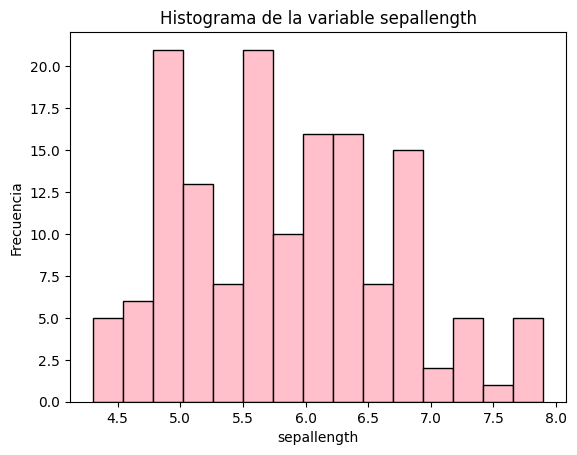

{'mean': 5.843333333333334, 'median': 5.8, 'std': 0.8280661279778629, 'q25': 5.1, 'q50': 5.8, 'q75': 6.4}


In [8]:
print(prueba2.estad_variable("sepallength"))

In [11]:
print(prueba2.estad_variable("sepallensdsgth")) 

La variable no está en la base de datos. Pruebe la función 'disponibles' para saber cuáles variables hay


In [12]:
print(prueba2.estad_variable("class")) 

La variable seleccionada no es numérica
